<a href="https://www.kaggle.com/code/rahulrock123/digit-classification-using-cnns?scriptVersionId=128738798" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Digit Recognizer Uisng CNN

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
sns.set(style='whitegrid')
# DL libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, BatchNormalization, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


**CountPlot**

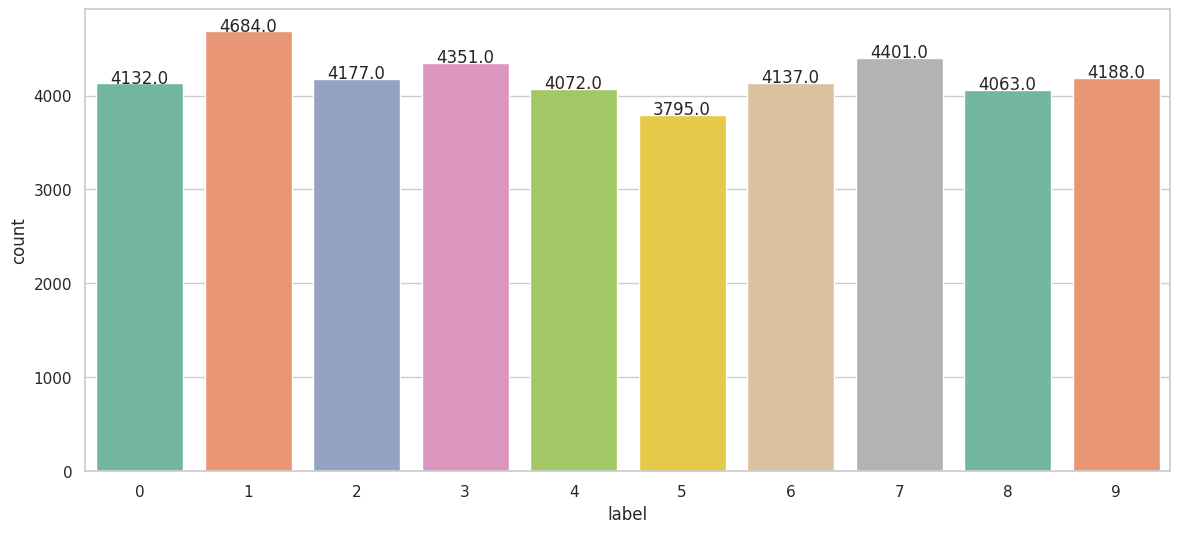

In [5]:
plt.figure(figsize=(14, 6))
ax = sns.countplot(data = df, x= 'label', palette = 'Set2')
for p in ax.patches:
    x = 0
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:}'.format(height),
            ha="center") 
    x+=1
plt.show()

 # Visualizing data w.r.t each class

In [6]:
def plot_samples(df, cls = 1):
    fig = plt.figure(figsize = (10,10))
    fig.suptitle('Samples of Class - {}'.format(cls), fontsize=16)
    data = df[df.label == cls]
    for i in range(1, 10):
        fig.add_subplot(3,3,i)
        plt.imshow(data.iloc[i, 1:].values.reshape(28, 28))
        plt.axis('off')
    plt.show()

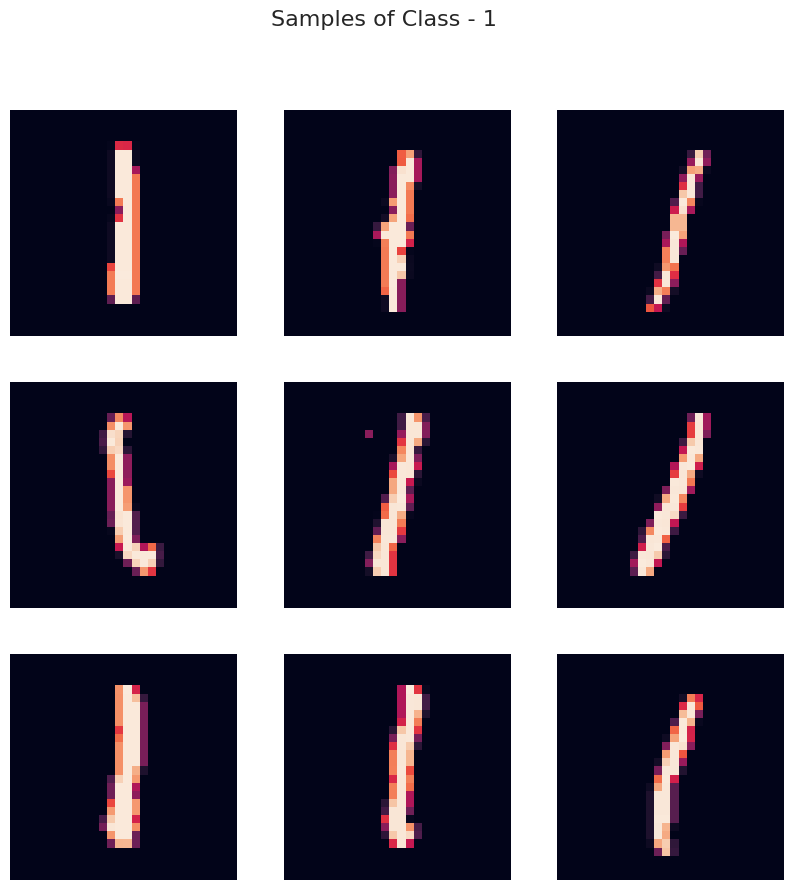

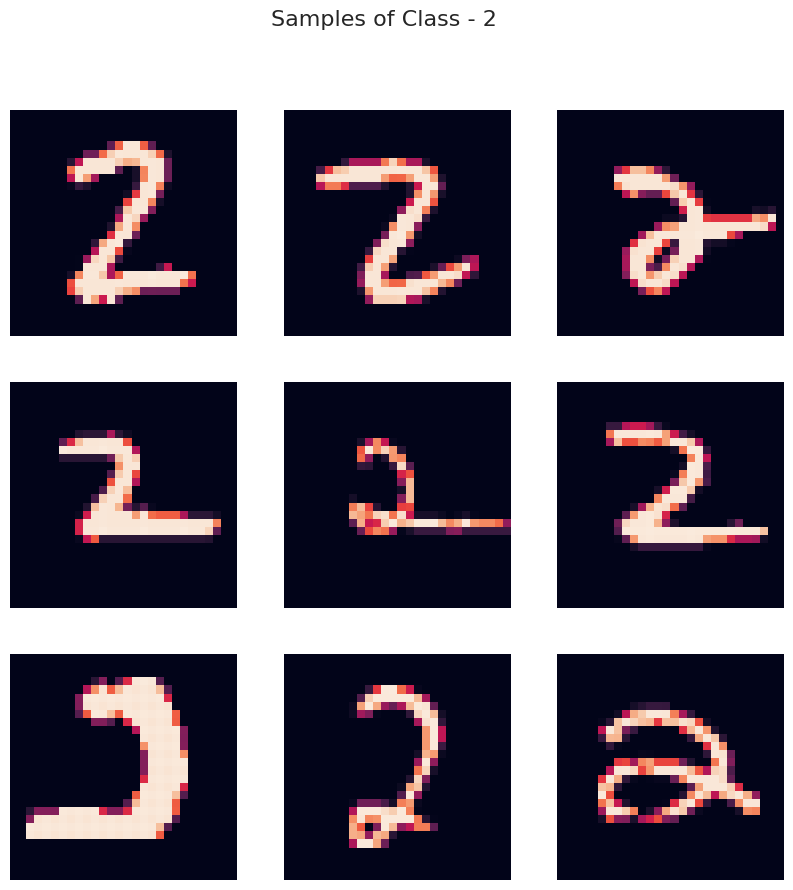

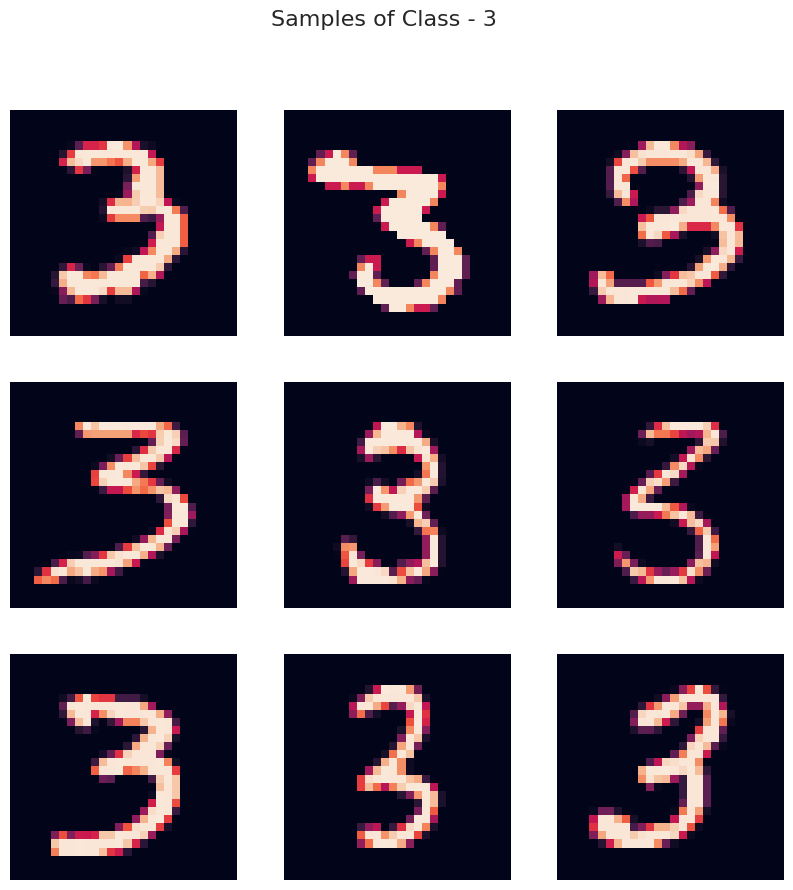

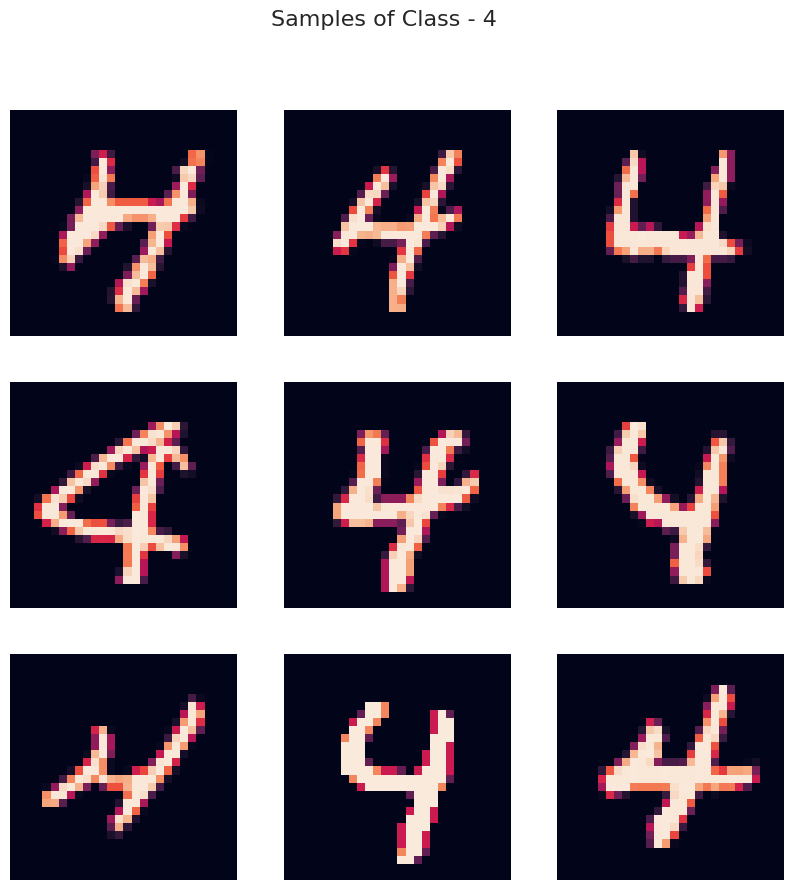

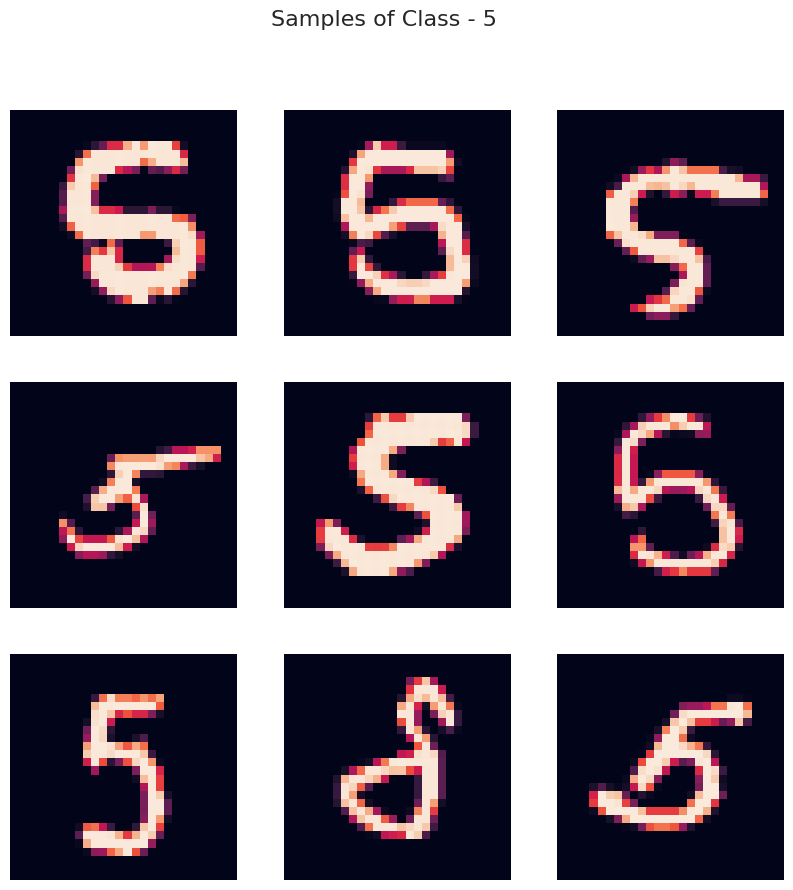

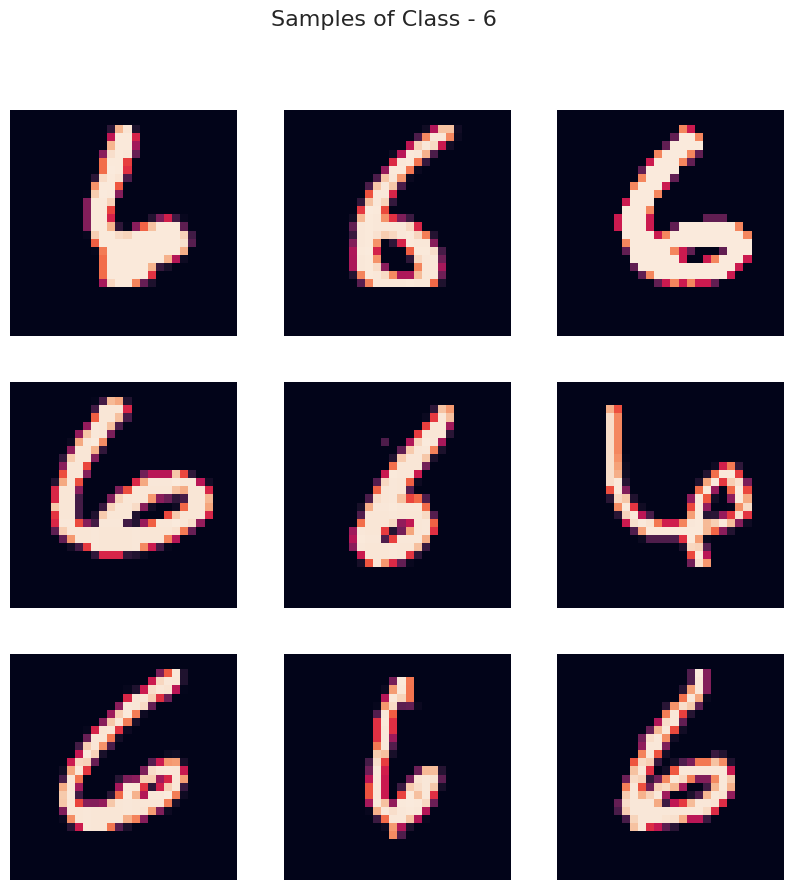

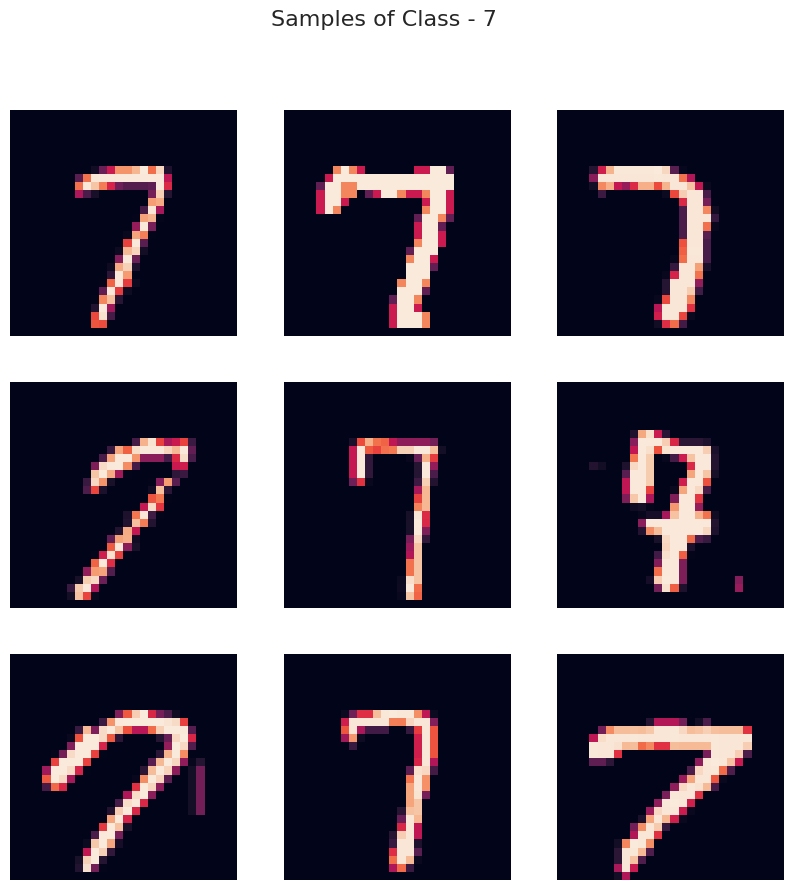

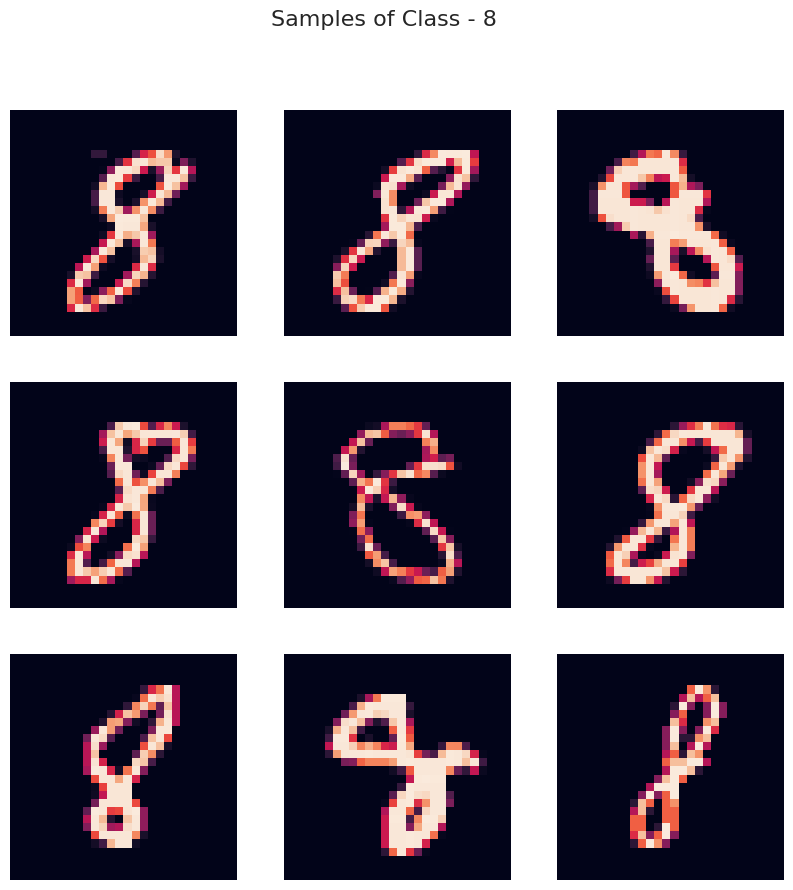

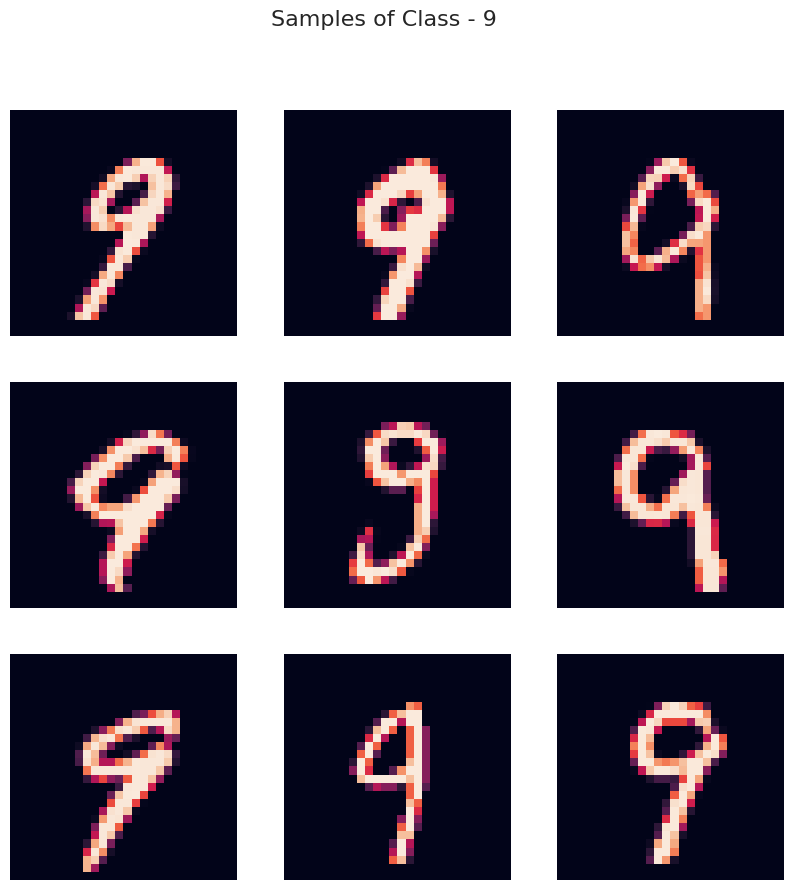

In [7]:
for i in range(1, 10):
    plot_samples(df, cls = i)

In [8]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0]

In [9]:
X.shape, y.shape

((42000, 784), (42000,))

# Normalizing data

In [10]:
# create scaler
scaler = MinMaxScaler()
# fit scaler on data
scaler.fit(X)
# apply transform
normalized = scaler.transform(X)

In [11]:
# Reshaping data into 28X28
X = X.reshape(-1, 28, 28, 1)
y = to_categorical(y, num_classes = 10)

# Split data into train and validation

In [12]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.20, random_state = 6)

print('Train Shape: {}\nValid Shape: {}'.format(X_train.shape, X_valid.shape))

Train Shape: (33600, 28, 28, 1)
Valid Shape: (8400, 28, 28, 1)


# Data Agumentation

In [13]:
data_gen = ImageDataGenerator(rescale=1./255,
                                rotation_range=15,
                                width_shift_range=.14,
                                height_shift_range=.15,
                                horizontal_flip=False,
                                zoom_range = 0.12)

In [14]:
model = Sequential() 

model.add(Conv2D(128, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (5,5),activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3),activation ='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3),activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), (2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(32, (3,3), activation ='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(10, activation = "softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 128)       3328      
                                                                 
 batch_normalization (BatchN  (None, 24, 24, 128)      512       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 128)       409728    
                                                                 
 batch_normalization_1 (Batc  (None, 20, 20, 128)      512       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 128)      0         
 )                                                               
                                                        

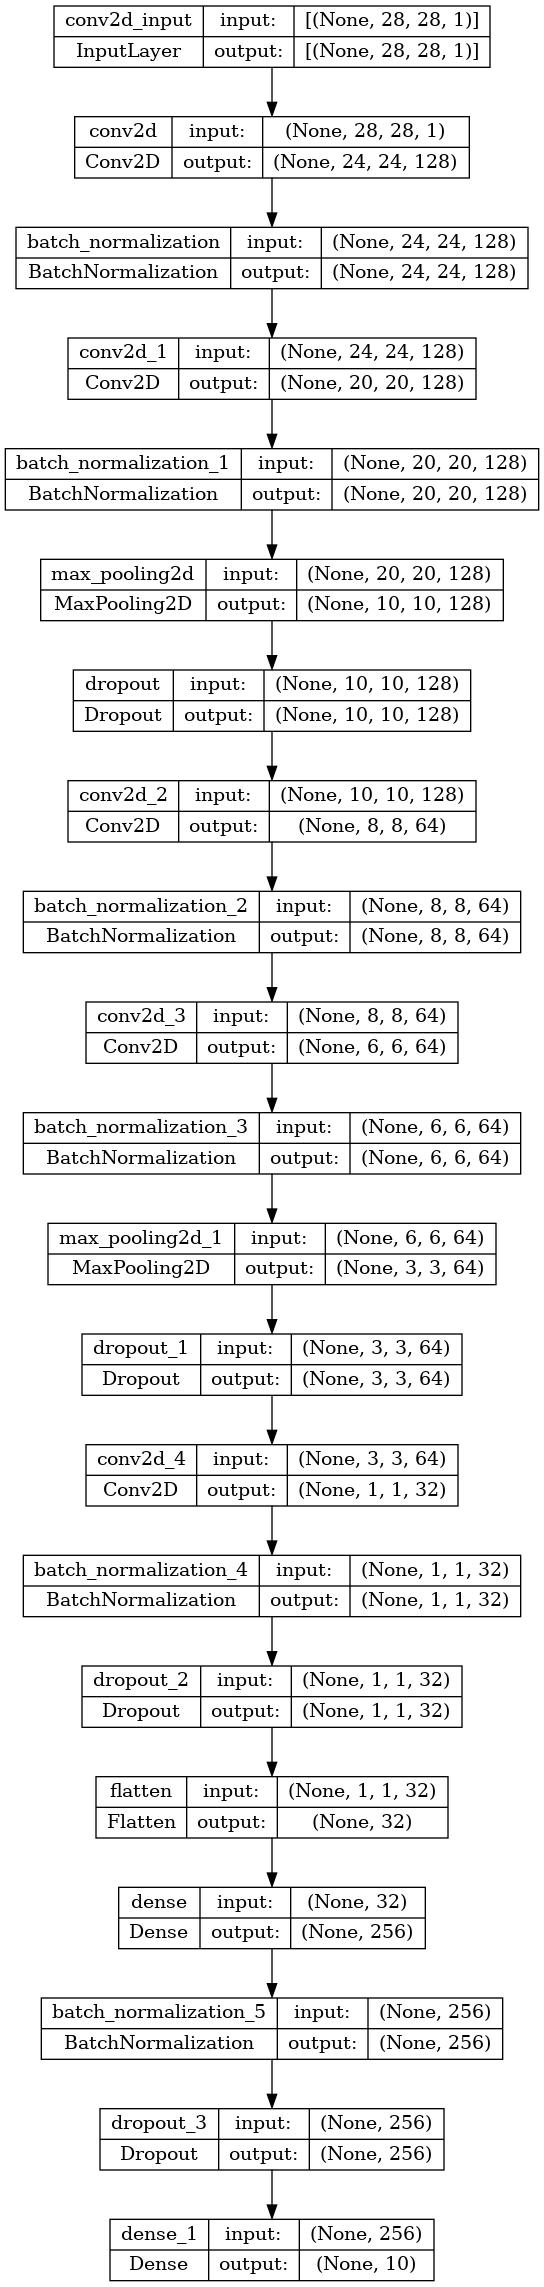

In [15]:
# Plot Model
plot_model(model, to_file='model.png', show_shapes=True)

In [16]:
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [17]:
## Callbacks
model_check = ModelCheckpoint('best_model.h5', monitor='accuracy', verbose=0, save_best_only=True, mode='max')

early = EarlyStopping(monitor='accuracy', min_delta=0, patience=5, verbose=0, mode='max', restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=5, min_lr=0.000001)

In [18]:
history = model.fit_generator(data_gen.flow(X_train, y_train, batch_size=64, seed=2),
                              steps_per_epoch=(len(X_train)*0.8)//64, epochs=100, 
                              validation_data=data_gen.flow(X_valid, y_valid, batch_size=64, seed=2), 
                              validation_steps=(len(X_valid)*0.2)//64,
                             callbacks = [model_check, early, reduce_lr])

Epoch 1/100


/tmp/ipykernel_23/155236741.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(data_gen.flow(X_train, y_train, batch_size=64, seed=2),
2023-05-08 09:13:19.986260: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


420/420 [==============================] - 26s 32ms/step - loss: 1.3035 - accuracy: 0.5794 - val_loss: 1.9691 - val_accuracy: 0.4147 - lr: 0.0010
Epoch 2/100
420/420 [==============================] - 14s 33ms/step - loss: 0.3878 - accuracy: 0.8792 - val_loss: 0.3061 - val_accuracy: 0.9056 - lr: 0.0010
Epoch 3/100
420/420 [==============================] - 13s 32ms/step - loss: 0.2561 - accuracy: 0.9250 - val_loss: 0.1247 - val_accuracy: 0.9675 - lr: 0.0010
Epoch 4/100
420/420 [==============================] - 13s 30ms/step - loss: 0.1884 - accuracy: 0.9443 - val_loss: 0.0980 - val_accuracy: 0.9700 - lr: 0.0010
Epoch 5/100
420/420 [==============================] - 13s 31ms/step - loss: 0.1631 - accuracy: 0.9530 - val_loss: 0.0832 - val_accuracy: 0.9760 - lr: 0.0010
Epoch 6/100
420/420 [==============================] - 13s 32ms/step - loss: 0.1396 - accuracy: 0.9587 - val_loss: 0.0906 - val_accuracy: 0.9784 - lr: 0.0010
Epoch 7/100
420/420 [==============================] - 13s 31ms/

# Accuracy and Loss Graphs

In [19]:
hist_df = pd.DataFrame(data = history.history)
fig = go.Figure()
ind = np.arange(1, len(history.history['accuracy'])+1)
fig.add_trace(go.Scatter(x=ind, mode='lines+markers', y=hist_df['accuracy'], marker=dict(color="dodgerblue"), name="Train_Accyracy"))
    
fig.add_trace(go.Scatter(x=ind, mode='lines+markers', y=hist_df['val_accuracy'], marker=dict(color="darkorange"),name="Validation_Accuracy"))
    
fig.update_layout(title_text='Accuracy', yaxis_title='Accuracy', xaxis_title="Epochs", template="plotly_white")

fig.show()

In [20]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=ind, mode='lines+markers', y=hist_df['loss'], marker=dict(color="dodgerblue"), name="Train_Loss"))
    
fig.add_trace(go.Scatter(x=ind, mode='lines+markers', y=hist_df['val_loss'], marker=dict(color="darkorange"),name="Validation_Loss"))
    
fig.update_layout(title_text='Loss', yaxis_title='Loss', xaxis_title="Epochs", template="plotly_white")

fig.show()

In [21]:
pred = np.argmax(model.predict(X_valid), axis=1)

263/263 [==============================] - 1s 3ms/step


# Confusion Matrix

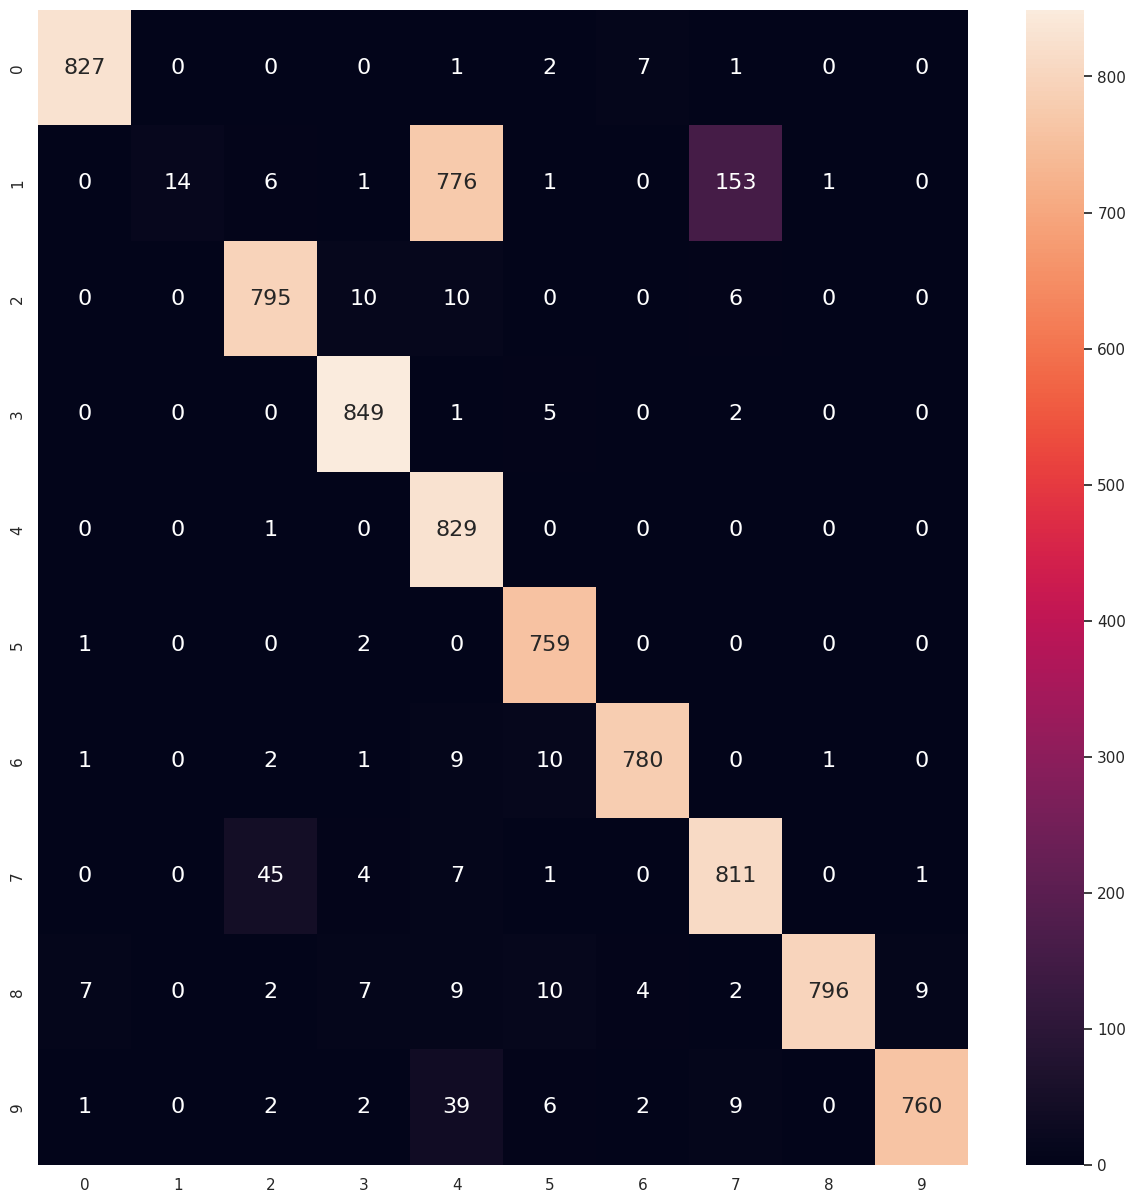

In [22]:
plt.figure(figsize = (15, 15))
sns.heatmap(confusion_matrix(np.argmax(y_valid, axis=1), pred), annot=True, annot_kws={"size": 16}, fmt = 'd') 
plt.show()

In [23]:
print(classification_report(np.argmax(y_valid, axis=1), pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       838
           1       1.00      0.01      0.03       952
           2       0.93      0.97      0.95       821
           3       0.97      0.99      0.98       857
           4       0.49      1.00      0.66       830
           5       0.96      1.00      0.98       762
           6       0.98      0.97      0.98       804
           7       0.82      0.93      0.88       869
           8       1.00      0.94      0.97       846
           9       0.99      0.93      0.96       821

    accuracy                           0.86      8400
   macro avg       0.91      0.87      0.84      8400
weighted avg       0.91      0.86      0.82      8400

